<a href="https://colab.research.google.com/github/JCMR-Andrade/Main/blob/main/Analise%20PCA%20/Analise%20REX%20Junho_Vr.02%20(29_07_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Análise Fatorial PCA
#%% Instalando os pacotes


!pip install factor_analyzer
!pip install pingouin
!pip install pyshp

In [ ]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go


In [80]:
#%% Importando o banco de dados

df = pd.read_excel("/content/Planilha_Rex_Jun_Teste.xlsx")
df_Cat = df['KPIs']
df_Cat

0               TABACARIA ESPECIAL
1              TABACARIA ORDINÁRIA
2                        ALCOOLICO
3                   NÃO ALCOOLICOS
4                     FOOD SERVICE
5                       BOMBONIERE
6                         SORVETES
7    SNACKS E BISCOITOS APERITIVOS
8                OUTRAS CATEGORIAS
Name: KPIs, dtype: object

In [30]:
#%% Estatísticas descritiva das variáveis

df1 = df.copy()
df_desc = df1.describe().T
df_desc


count          mean           std      min      25%  \
2023-01-01 00:00:00    9.0   9555.261111   9871.955860  1075.12  3217.60   
2023-02-01 00:00:00    9.0   9289.917778   9283.544893  1009.50  3677.45   
2023-03-01 00:00:00    9.0  10849.414444  11043.485981  1282.00  3464.53   
2023-04-01 00:00:00    9.0  10815.321111  11242.534587  1088.50  2881.76   
2023-05-01 00:00:00    9.0  11389.768889  11473.069544  1248.00  2381.61   
2023-06-01 00:00:00    9.0  11313.486667  13291.873262   632.50  1782.25   
2023-07-01 00:00:00    9.0  11691.820000  14711.283890   546.00  1828.50   
2023-08-01 00:00:00    9.0  12235.227778  13131.189903  1145.00  3467.47   
2023-09-01 00:00:00    9.0  12477.186667  12728.976124  1764.50  3543.87   
2023-10-01 00:00:00    9.0  12736.755556  12906.283089  1774.51  3549.18   
2023-11-01 00:00:00    9.0  12456.880000  12506.795753  1566.50  4434.50   
2023-12-01 00:00:00    9.0  14019.155556  12921.662346  1899.00  5126.77   
2024-01-01 00:00:00    9.0  12662.605556  12990.894075  1424.90  3540.23   
2024-02-01 00:00:00    9.0  12253.272222  12400.232276  1629.69  3910.01   
2024-03-01 00:00:00    9.0  10849.414444  11043.485981  1282.00  3464.53   
2024-04-01 00:00:00    9.0  10815.321111  11242.534587  1088.50  2881.76   
2024-05-01 00:00:00    9.0  13932.467778  14264.452682  1429.60  4389.66   
2024-06-01 00:00:00    9.0  13253.971111  13730.696982  1061.80  3933.26   

                         50%       75%       max  
2023-01-01 00:00:00  5188.49  14048.67  28554.50  
2023-02-01 00:00:00  5289.00  12482.60  27469.00  
2023-03-01 00:00:00  5429.96  15992.32  31882.50  
2023-04-01 00:00:00  5639.00  15009.38  32068.00  
2023-05-01 00:00:00  7861.67  11387.52  33192.75  
2023-06-01 00:00:00  7598.04   9644.59  38679.98  
2023-07-01 00:00:00  5320.90  10931.04  40724.48  
2023-08-01 00:00:00  8097.40  12871.26  35109.75  
2023-09-01 00:00:00  8351.00  14309.54  34190.75  
2023-10-01 00:00:00  7830.00  16331.20  34790.00  
2023-11-01 00:00:00  5753.75  16724.26  33747.50  
2023-12-01 00:00:00  7404.00  21651.98  36133.00  
2024-01-01 00:00:00  7903.00  15432.52  34836.00  
2024-02-01 00:00:00  7529.00  13925.43  33157.00  
2024-03-01 00:00:00  5429.96  15992.32  31882.50  
2024-04-01 00:00:00  5639.00  15009.38  32068.00  
2024-05-01 00:00:00  8662.00  14742.88  41894.71  
2024-06-01 00:00:00  9116.50  13286.53  38555.75

In [53]:
df2 = df

df2 = df2.T
df2

0         1         2         3         4        5  \
2023-01-01 00:00:00  5188.49  28554.50   7082.95  14048.67  22034.62  3627.90   
2023-02-01 00:00:00  5289.00  27469.00   6632.10  12482.60  21098.07  4777.93   
2023-03-01 00:00:00  5097.99  31882.50   7278.92  15992.32  25234.44  5429.96   
2023-04-01 00:00:00  5639.00  32068.00   8574.08  15009.38  25880.28  4896.63   
2023-05-01 00:00:00  7202.00  33192.75   7861.67   9810.00  27733.72  2381.61   
2023-06-01 00:00:00   632.50  38679.98   7598.04   9644.59  28530.51  5680.07   
2023-07-01 00:00:00   546.00  40724.48   8218.85  10931.04  32671.03  5320.90   
2023-08-01 00:00:00  8547.97  35109.75   8097.40  12871.26  33804.58  5614.16   
2023-09-01 00:00:00  8351.00  34190.75  10434.74  14309.54  33233.30  4631.24   
2023-10-01 00:00:00  7830.00  34790.00  10186.47  16331.20  33278.78  4770.66   
2023-11-01 00:00:00  5753.75  32031.00  11028.09  16724.26  33747.50  4678.51   
2023-12-01 00:00:00  7404.00  36133.00  14193.90  21651.98  31713.30  5126.77   
2024-01-01 00:00:00  7903.00  34836.00  10812.01  15432.52  33511.03  4558.05   
2024-02-01 00:00:00  7529.00  33157.00  10677.07  13925.43  32754.43  4797.52   
2024-03-01 00:00:00  5097.99  31882.50   7278.92  15992.32  25234.44  5429.96   
2024-04-01 00:00:00  5639.00  32068.00   8574.08  15009.38  25880.28  4896.63   
2024-05-01 00:00:00  8662.00  33160.00  12823.11  14742.88  41894.71  6091.35   
2024-06-01 00:00:00  9116.50  33911.75  12025.63  13286.53  38555.75  5200.22   

                           6        7         8  
2023-01-01 00:00:00  1167.50  1075.12   3217.60  
2023-02-01 00:00:00  1009.50  1173.61   3677.45  
2023-03-01 00:00:00  1282.00  1982.07   3464.53  
2023-04-01 00:00:00  1088.50  1300.26   2881.76  
2023-05-01 00:00:00  1248.00  1690.65  11387.52  
2023-06-01 00:00:00  1057.00  1782.25   8216.44  
2023-07-01 00:00:00  1015.50  1828.50   3970.08  
2023-08-01 00:00:00  1145.00  1459.46   3467.47  
2023-09-01 00:00:00  1764.50  1835.74   3543.87  
2023-10-01 00:00:00  1774.51  2120.00   3549.18  
2023-11-01 00:00:00  1566.50  2147.81   4434.50  
2023-12-01 00:00:00  1899.00  2312.16   5738.29  
2024-01-01 00:00:00  1424.90  1945.71   3540.23  
2024-02-01 00:00:00  1899.30  1629.69   3910.01  
2024-03-01 00:00:00  1282.00  1982.07   3464.53  
2024-04-01 00:00:00  1088.50  1300.26   2881.76  
2024-05-01 00:00:00  1429.60  2198.90   4389.66  
2024-06-01 00:00:00  1061.80  2194.30   3933.26

In [54]:
df_corr = df2.corr()
df_corr

0         1         2         3         4         5         6  \
0  1.000000 -0.314484  0.560804  0.388251  0.465691 -0.134944  0.480640   
1 -0.314484  1.000000  0.268633 -0.170744  0.501497  0.323746  0.086441   
2  0.560804  0.268633  1.000000  0.569911  0.775448  0.216739  0.648064   
3  0.388251 -0.170744  0.569911  1.000000  0.100660  0.212144  0.607506   
4  0.465691  0.501497  0.775448  0.100660  1.000000  0.362214  0.377848   
5 -0.134944  0.323746  0.216739  0.212144  0.362214  1.000000 -0.050379   
6  0.480640  0.086441  0.648064  0.607506  0.377848 -0.050379  1.000000   
7  0.233335  0.465813  0.690964  0.415442  0.683996  0.330530  0.497748   
8 -0.151938  0.276192 -0.036236 -0.418425 -0.003297 -0.467553 -0.025240   

          7         8  
0  0.233335 -0.151938  
1  0.465813  0.276192  
2  0.690964 -0.036236  
3  0.415442 -0.418425  
4  0.683996 -0.003297  
5  0.330530 -0.467553  
6  0.497748 -0.025240  
7  1.000000  0.155243  
8  0.155243  1.000000

In [57]:
# Gráfico interativo

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.3f}',
        colorscale='viridis'))

fig.update_layout(
    height = 750,
    width = 750,
    yaxis=dict(autorange="reversed"))


Error: could not locate runnable browser

Figure({
    'data': [{'colorscale': [[0.0, '#440154'], [0.1111111111111111, '#482878'],
                             [0.2222222222222222, '#3e4989'], [0.3333333333333333,
                             '#31688e'], [0.4444444444444444, '#26828e'],
                             [0.5555555555555556, '#1f9e89'], [0.6666666666666666,
                             '#35b779'], [0.7777777777777778, '#6ece58'],
                             [0.8888888888888888, '#b5de2b'], [1.0, '#fde725']],
              'text': array([[ 1.        , -0.31448393,  0.56080357,  0.38825145,  0.46569144,
                              -0.1349444 ,  0.48063975,  0.23333535, -0.15193787],
                             [-0.31448393,  1.        ,  0.2686329 , -0.17074398,  0.50149732,
                               0.3237458 ,  0.08644058,  0.46581296,  0.27619187],
                             [ 0.56080357,  0.2686329 ,  1.        ,  0.56991052,  0.77544845,
                               0.21673871,  0.64806368,  0.69096411, -0.03623601],
                             [ 0.38825145, -0.17074398,  0.56991052,  1.        ,  0.1006597 ,
                               0.21214381,  0.6075057 ,  0.41544164, -0.41842458],
                             [ 0.46569144,  0.50149732,  0.77544845,  0.1006597 ,  1.        ,
                               0.36221415,  0.37784762,  0.68399627, -0.0032965 ],
                             [-0.1349444 ,  0.3237458 ,  0.21673871,  0.21214381,  0.36221415,
                               1.        , -0.05037852,  0.33052957, -0.46755291],
                             [ 0.48063975,  0.08644058,  0.64806368,  0.6075057 ,  0.37784762,
                              -0.05037852,  1.        ,  0.49774832, -0.02523997],
                             [ 0.23333535,  0.46581296,  0.69096411,  0.41544164,  0.68399627,
                               0.33052957,  0.49774832,  1.        ,  0.15524282],
                             [-0.15193787,  0.27619187, -0.03623601, -0.41842458, -0.0032965 ,
                              -0.46755291, -0.02523997,  0.15524282,  1.        ]]),
              'texttemplate': '%{text:.3f}',
              'type': 'heatmap',
              'x': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
              'y': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
              'z': array([[ 1.        , -0.31448393,  0.56080357,  0.38825145,  0.46569144,
                           -0.1349444 ,  0.48063975,  0.23333535, -0.15193787],
                          [-0.31448393,  1.        ,  0.2686329 , -0.17074398,  0.50149732,
                            0.3237458 ,  0.08644058,  0.46581296,  0.27619187],
                          [ 0.56080357,  0.2686329 ,  1.        ,  0.56991052,  0.77544845,
                            0.21673871,  0.64806368,  0.69096411, -0.03623601],
                          [ 0.38825145, -0.17074398,  0.56991052,  1.        ,  0.1006597 ,
                            0.21214381,  0.6075057 ,  0.41544164, -0.41842458],
                          [ 0.46569144,  0.50149732,  0.77544845,  0.1006597 ,  1.        ,
                            0.36221415,  0.37784762,  0.68399627, -0.0032965 ],
                          [-0.1349444 ,  0.3237458 ,  0.21673871,  0.21214381,  0.36221415,
                            1.        , -0.05037852,  0.33052957, -0.46755291],
                          [ 0.48063975,  0.08644058,  0.64806368,  0.6075057 ,  0.37784762,
                           -0.05037852,  1.        ,  0.49774832, -0.02523997],
                          [ 0.23333535,  0.46581296,  0.69096411,  0.41544164,  0.68399627,
                            0.33052957,  0.49774832,  1.        ,  0.15524282],
                          [-0.15193787,  0.27619187, -0.03623601, -0.41842458, -0.0032965 ,
                           -0.46755291, -0.02523997,  0.15524282,  1.        ]])}],
    'layout': {'height': 750, 'template': '...', 'width': 750, 'yaxis': {'autorange': 'reversed'}}
})

In [58]:
#%% Teste de Esfericidade de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(df_corr)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')


Qui² Bartlett: 202.66
p-valor: 0.0


In [74]:
#%% Definindo a PCA (procedimento inicial extraindo todos os fatores possíveis)

fa = FactorAnalyzer(n_factors=4, method='principal', rotation=None).fit(df_corr)

In [75]:
#%% Obtendo os autovalores

autovalores = fa.get_eigenvalues()[0]

print(autovalores)
# Soma dos autovalores

round(autovalores.sum(), 2)

[4.15580929e+00 2.45684387e+00 1.51233420e+00 6.05634437e-01
 1.78642703e-01 5.96374837e-02 2.93494165e-02 1.74859482e-03
 2.98251869e-16]


9.0

In [76]:
#%% Eigenvalues, variâncias e variâncias acumuladas

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   4.155809   0.461757             0.461757
Fator 2   2.456844   0.272983             0.734739
Fator 3   1.512334   0.168037             0.902776
Fator 4   0.605634   0.067293             0.970069


<ipython-input-77-9cd5c41c5b25>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




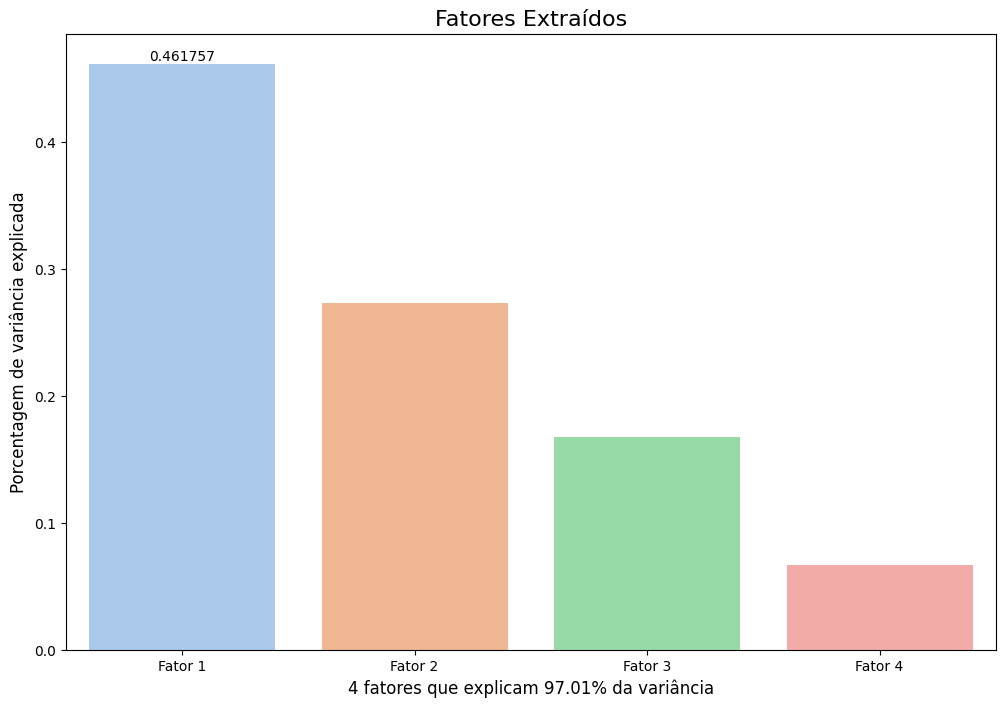

In [77]:
#%% Gráfico da variância acumulada dos componentes principais

plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='pastel')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraídos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

In [78]:
#%% Determinando as cargas fatoriais

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = df_corr.columns

print(tabela_cargas)


    Fator 1   Fator 2   Fator 3   Fator 4
0  0.806916 -0.386199  0.215329 -0.381527
1 -0.467654  0.823761  0.167447  0.143256
2  0.920010  0.247123  0.247886 -0.041550
3  0.864664 -0.227432 -0.303419  0.310981
4  0.489043  0.722420  0.291998 -0.387537
5  0.146886  0.668982 -0.720909 -0.045931
6  0.840685 -0.235000  0.277915  0.303657
7  0.520502  0.697375  0.292649  0.294033
8 -0.673439 -0.073028  0.718726  0.100778


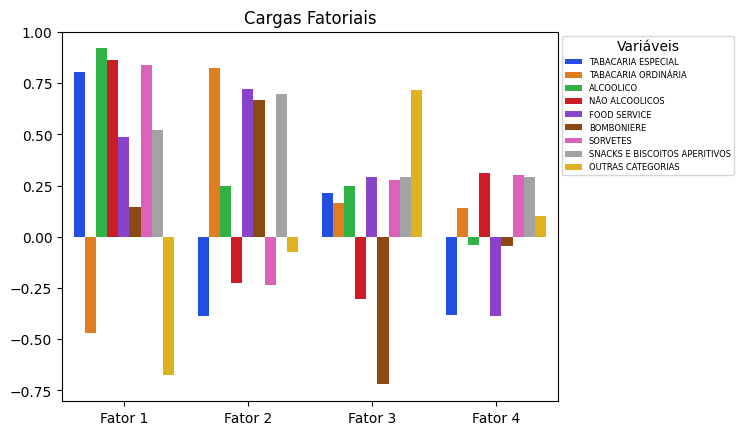

In [94]:
#%% Analisando as cargas fatoriais em cada fator extraído

tabela_cargas_graph = tabela_cargas.reset_index()
tabela_cargas_graph = tabela_cargas_graph.melt(id_vars='index')

# Supondo que df_Cat tenha uma coluna 'nome_variavel' com os nomes desejados para a legenda
categorias = df_Cat.tolist()

# Criando o gráfico
palette = sns.color_palette('bright', len(tabela_cargas_graph['index'].unique()))
sns.barplot(data=tabela_cargas_graph, x='variable', y='value', hue='index', palette=palette)

# Personalizando a legenda
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, title='Variáveis', bbox_to_anchor=(1,1), fontsize='6', labels=categorias)

plt.title('Cargas Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()


In [95]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = df_corr.columns

print(tabela_comunalidades)

   Comunalidades
0       0.992193
1       0.945843
2       0.970663
3       0.988142
4       0.996501
5       0.990931
6       0.931420
7       0.929352
8       0.985577


In [96]:
#%% Extração dos fatores para as observações do banco de dados

fatores = pd.DataFrame(fa.transform(df_corr))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

df3 = pd.concat([df.reset_index(drop=True), fatores], axis=1)

In [97]:
#%% Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = df_corr.columns

print(tabela_scores)


    Fator 1   Fator 2   Fator 3   Fator 4
0  0.124683 -0.265314  0.130144 -0.773452
1 -0.153499  0.271540  0.103505  0.151933
2  0.398315  0.375914  0.195073  0.296788
3 -0.070455 -0.525969 -0.249684 -0.061692
4 -0.043844  0.042703  0.164629 -0.973446
5 -0.078629  0.094940 -0.496760 -0.311209
6  0.196540 -0.104601  0.182752  0.489509
7  0.231430  0.449081  0.212209  0.704777
8 -0.400000 -0.400000  0.433333 -0.325000


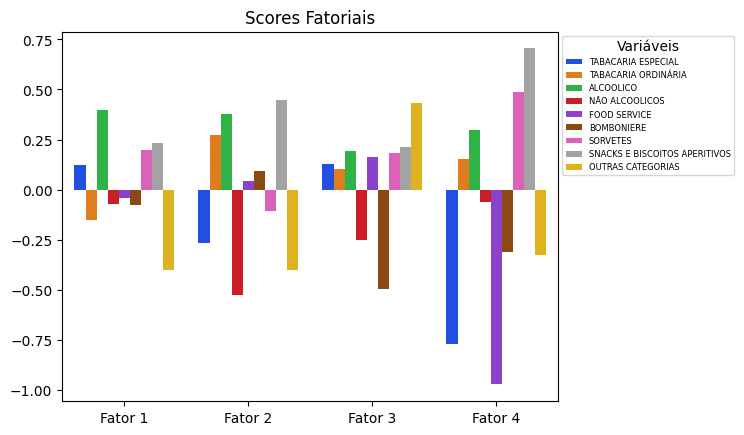

In [101]:
#%% Analisando os scores fatoriais em cada fator extraído

tabela_scores_graph = tabela_scores.reset_index()
tabela_scores_graph = tabela_scores_graph.melt(id_vars='index')

sns.barplot(data=tabela_scores_graph, x='variable', y='value', hue='index', palette=palette)

# Personalizando a legenda
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, title='Variáveis', bbox_to_anchor=(1,1), fontsize='6', labels=categorias)

plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()


In [102]:
#%% Vamos consolidar os 3 fatores em uma medida única (soma ponderada)

df3['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    df3['Ranking'] = df3['Ranking'] + df3[tabela_eigen.index[index]]*variancia


In [104]:
df3.reset_index(inplace=True)
df3.set_index('index', inplace=True)


df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   KPIs                 9 non-null      object 
 1   2023-01-01 00:00:00  9 non-null      float64
 2   2023-02-01 00:00:00  9 non-null      float64
 3   2023-03-01 00:00:00  9 non-null      float64
 4   2023-04-01 00:00:00  9 non-null      float64
 5   2023-05-01 00:00:00  9 non-null      float64
 6   2023-06-01 00:00:00  9 non-null      float64
 7   2023-07-01 00:00:00  9 non-null      float64
 8   2023-08-01 00:00:00  9 non-null      float64
 9   2023-09-01 00:00:00  9 non-null      float64
 10  2023-10-01 00:00:00  9 non-null      float64
 11  2023-11-01 00:00:00  9 non-null      float64
 12  2023-12-01 00:00:00  9 non-null      float64
 13  2024-01-01 00:00:00  9 non-null      float64
 14  2024-02-01 00:00:00  9 non-null      float64
 15  2024-03-01 00:00:00  9 non-null      float64
 16 

In [105]:
#%% Os preços alinham-se às características representadas nos fatores?

pg.rcorr(df3[['Ranking', 'Fator 1', 'Fator 2', 'Fator 3', 'Fator 4']],
         method = 'pearson', upper = 'pval',
         decimals = 4,
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

Ranking Fator 1 Fator 2 Fator 3 Fator 4
Ranking       -     ***                        
Fator 1  0.8156       -                        
Fator 2  0.4822    -0.0       -                
Fator 3  0.2968     0.0     0.0       -        
Fator 4  0.1189    -0.0    -0.0     0.0       -